# 🧩 **01. Definição do Problema**

## **Projeto MVP – Previsão de Preços de Imóveis em Melbourne**

### **Objetivo**
Desenvolver um modelo preditivo capaz de estimar o preço de imóveis na cidade de Melbourne com base em atributos como localização, número de cômodos, área construída, com ou sem vaga ou tipo de imóvel.

### **Hipóteses**
- Imóveis com mais cômodos e maior área tendem a ter preços mais altos.
- A localização (subúrbio) influencia fortemente o preço.
- A presença de vagas de garagem pode impactar o valor final.

### **Restrições**
- Atributos mistos (numéricos e categóricos).
- Necessidade de reprodutibilidade e explicabilidade.

### **Descrição dos dataset**
- Os dados fornecidos são um conjunto de vendas de imóveis no subúrbio de Abbotsford, Victoria, Austrália. Inclui detalhes como endereço, número de cômodos, tipo de imóvel, preço, método de venda, além de informações sobre a localização e as características do imóvel, como distância do centro da cidade, CEP, vagas de estacionamento, tamanho do terreno, área construída, ano de construção entre outras.
- Alvo: Price (Preço)


---


### *Fonte dos Dados*
Dataset público disponível no Kaggle: Melbourne Housing Dataset.



# 🔎 **02. Carregamento e Visualização Inicial dos Dados**

Nesta etapa, carregamos os dados originais e realizamos uma análise exploratória inicial para entender a estrutura do dataset, identificar tipos de variáveis, valores ausentes, dados duplicados e obter uma visão geral dos dados.

In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/HuriAnn/mvp_melbourne-_housing/main/Melbourne_housing.csv'
df = pd.read_csv(url)

/tmp/ipython-input-1038304340.py:4: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


In [2]:
# Visão geral da estrutura do dataset
print("🔍 Estrutura do Dataset:")
display(df.info())

# Estatísticas descritivas das variáveis numéricas
print("\n📊 Estatísticas Descritivas:")
display(df.describe())

# Verificação de valores ausentes
print("\n🧼 Verificação de Valores Nulos:")
display(df.isnull().sum().sort_values(ascending=False))

# Visualização das primeiras linhas
print("\n📋 Primeiras Linhas do Dataset:")
display(df.head())

# Verificação de duplicatas
print("\n🔁 Verificação de Linhas Duplicadas:")
print(f"Total de duplicatas: {df.duplicated().sum()}")

# Verificação de inconsistência: Bedroom > Rooms
inconsistentes = df[df['Bedroom'] > df['Rooms']]
print(f"\n🚨 Registros inconsistentes (Bedroom > Rooms): {inconsistentes.shape[0]}")
display(inconsistentes.sample(5))


🔍 Estrutura do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Method         34857 non-null  object 
 5   SellerG        34857 non-null  object 
 6   Date           34857 non-null  object 
 7   Distance       34856 non-null  float64
 8   Postcode       34856 non-null  float64
 9   Bedroom        26640 non-null  float64
 10  Bathroom       26631 non-null  float64
 11  Car            26129 non-null  float64
 12  Landsize       23047 non-null  float64
 13  BuildingArea   13760 non-null  object 
 14  YearBuilt      15551 non-null  float64
 15  CouncilArea    34854 non-null  object 
 16  Latitude       26881 non-null  float64
 17  Longtitude     26881 non-n

None


📊 Estatísticas Descritivas:


,Rooms,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,YearBuilt,Latitude,Longtitude,Propertycount,Price
count,34857.000000,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,15551.000000,26881.000000,26881.000000,34854.000000,2.724700e+04
mean,3.031012,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,1965.289885,-37.810634,145.001851,7572.888306,1.050173e+06
std,0.969933,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,37.328178,0.090279,0.120169,4428.090313,6.414671e+05
min,1.000000,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.190430,144.423790,83.000000,8.500000e+04
25%,2.000000,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,1940.000000,-37.862950,144.933500,4385.000000,6.350000e+05
50%,3.000000,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,1970.000000,-37.807600,145.007800,6763.000000,8.700000e+05
75%,4.000000,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,2000.000000,-37.754100,145.071900,10412.000000,1.295000e+06
max,16.000000,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,2106.000000,-37.390200,145.526350,21650.000000,1.120000e+07



🧼 Verificação de Valores Nulos:


,0
BuildingArea,21097
YearBuilt,19306
Landsize,11810
Car,8728
Bathroom,8226
Bedroom,8217
Latitude,7976
Longtitude,7976
Price,7610
CouncilArea,3



📋 Primeiras Linhas do Dataset:


,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Regionname,Propertycount,ParkingArea,Price
0,Abbotsford,68 Studley St,2,h,SS,Jellis,3/9/2016,2.5,3067.0,2.0,...,126.0,inf,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,Carport,NaN
1,Airport West,154 Halsey Rd,3,t,PI,Nelson,3/9/2016,13.5,3042.0,3.0,...,303.0,225,2016.0,Moonee Valley City Council,-37.7180,144.8780,Western Metropolitan,3464.0,Detached Garage,840000.0
2,Albert Park,105 Kerferd Rd,2,h,S,hockingstuart,3/9/2016,3.3,3206.0,2.0,...,120.0,82,1900.0,Port Phillip City Council,-37.8459,144.9555,Southern Metropolitan,3280.0,Attached Garage,1275000.0
3,Albert Park,85 Richardson St,2,h,S,Thomson,3/9/2016,3.3,3206.0,2.0,...,159.0,inf,NaN,Port Phillip City Council,-37.8450,144.9538,Southern Metropolitan,3280.0,Indoor,1455000.0
4,Alphington,30 Austin St,3,h,SN,McGrath,3/9/2016,6.4,3078.0,3.0,...,174.0,122,2003.0,Darebin City Council,-37.7818,145.0198,Northern Metropolitan,2211.0,Parkade,NaN



🔁 Verificação de Linhas Duplicadas:
Total de duplicatas: 0

🚨 Registros inconsistentes (Bedroom > Rooms): 279


,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Regionname,Propertycount,ParkingArea,Price
1285,Carnegie,68 Miller St,2,h,S,hockingstuart,6/8/2016,11.4,3163.0,3.0,...,299.0,115,1930.0,Glen Eira City Council,-37.89730,145.05300,Southern Metropolitan,7822.0,Parkade,967500.0
1023,Ivanhoe,9 Cook St,3,h,S,Nelson,4/6/2016,7.9,3079.0,5.0,...,626.0,378,2016.0,Banyule City Council,-37.76000,145.03260,Eastern Metropolitan,5549.0,Parkade,981000.0
32150,Viewbank,15 Rosemary Ct,4,h,SN,Nelson,28/05/2016,13.8,3084.0,5.0,...,776.0,216,1967.0,Banyule City Council,-37.72970,145.09430,Eastern Metropolitan,2698.0,Attached Garage,NaN
20628,Essendon West,2/44 Emerald St,2,u,VB,Nelson,18/06/2016,9.8,3040.0,3.0,...,196.0,NaN,1998.0,Moonee Valley City Council,-37.75130,144.88450,Western Metropolitan,588.0,Carport,520000.0
18962,Glen Waverley,7 Kinnoull Gr,5,h,PI,Jellis,17/06/2017,16.7,3150.0,6.0,...,662.0,119,1960.0,Monash City Council,-37.87853,145.15542,Eastern Metropolitan,15321.0,Detached Garage,2650000.0


Após o carregamento do dataset os resultados apresentados foram:

* Colunas com valores nulos significativos em BuildingArea, YearBuilt, Landsize, Car, Bathroom, Bedroom, Latitude, Longtitude e Price.
* Algumas colunas numéricas com dados no formato de texto (ex: BuildingArea contém valores como "inf").
* 279 registros onde o número de quartos (Bedroom) é maior que o número total de cômodos (Rooms), o que é incoerente.

A partir desse resultado as ações aplicadas serão:

* Tratamento de valores nulos
* Removoção de inconsistências
* Identificar variáveis relevantes para o modelo
* Tratar colunas categóricas

# 🧹 **03. Preparação dos Dados**

Nesta etapa, vamos realizar uma análise exploratória básica para entender a estrutura do dataset, identificar possíveis problemas como valores ausentes ou duplicados, e obter uma visão geral das variáveis disponíveis.

In [3]:
import pandas as pd

# 🔹 1. Remover registros inconsistentes (Bedroom > Rooms)
df = df[df['Bedroom'] <= df['Rooms']]

# 🔹 2. Remover registros sem valor na variável alvo (Price)
df = df[df['Price'].notnull()]

# 🔹 3. Remover colunas com muitos nulos ou baixa relevância preditiva
df.drop(columns=['BuildingArea', 'YearBuilt', 'CouncilArea', 'ParkingArea'], inplace=True, errors='ignore')

# 🔹 4. Imputar valores ausentes com estratégias
imputacoes_mediana = ['Car', 'Bathroom', 'Bedroom', 'Landsize', 'Latitude', 'Longtitude', 'Propertycount', 'Distance']
for col in imputacoes_mediana:
    df[col].fillna(df[col].median(), inplace=True)

# 🔹 5. Imputar Postcode com moda
df['Postcode'].fillna(df['Postcode'].mode()[0], inplace=True)

# 🔹 6. Transformar variáveis categóricas em dummies
df = pd.get_dummies(df, columns=['Type', 'Method', 'Regionname'], drop_first=True)

# 🔹 7. Transformar a coluna 'Date' em formato datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# 🔹 8. Remover linhas com datas inválidas (NaT) antes de criar variáveis derivadas
df = df.dropna(subset=['Date'])

# 🔹 9. Criar novas variáveis derivadas da data convertendo coluna 'Date' para datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')

# 🔹 10. Criar atributos derivados
df['Year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['dayofweek'] = df['Date'].dt.dayofweek

# 🔹 11. Remover a coluna original de data se não for mais necessária
df.drop(columns=['Date'], inplace=True)

# 🔹 12. Verificação final da estrutura após limpeza
print("✅ Dataset após limpeza e imputações:")
display(df.info())
display(df.head())



✅ Dataset após limpeza e imputações:
<class 'pandas.core.frame.DataFrame'>
Index: 7964 entries, 1 to 13383
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Suburb                                 7964 non-null   object 
 1   Address                                7964 non-null   object 
 2   Rooms                                  7964 non-null   int64  
 3   SellerG                                7964 non-null   object 
 4   Distance                               7964 non-null   float64
 5   Postcode                               7964 non-null   float64
 6   Bedroom                                7964 non-null   float64
 7   Bathroom                               7964 non-null   float64
 8   Car                                    7964 non-null   float64
 9   Landsize                               7964 non-null   float64
 10  Latitude                               

/tmp/ipython-input-2761255157.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-2761255157.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

None

,Suburb,Address,Rooms,SellerG,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,...,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,Year,month,dayofweek
1,Airport West,154 Halsey Rd,3,Nelson,13.5,3042.0,3.0,2.0,1.0,303.0,...,False,False,False,False,False,True,False,2016,3,2
2,Albert Park,105 Kerferd Rd,2,hockingstuart,3.3,3206.0,2.0,1.0,0.0,120.0,...,False,False,False,False,True,False,False,2016,3,2
3,Albert Park,85 Richardson St,2,Thomson,3.3,3206.0,2.0,1.0,0.0,159.0,...,False,False,False,False,True,False,False,2016,3,2
5,Alphington,6 Smith St,4,Brace,6.4,3078.0,3.0,2.0,4.0,853.0,...,False,True,False,False,False,False,False,2016,3,2
6,Alphington,5/6 Yarralea St,3,Jellis,6.4,3078.0,3.0,2.0,2.0,208.0,...,False,True,False,False,False,False,False,2016,3,2


In [4]:
# Verificação de valores ausentes
print("\n🧼 Verificação de Valores Nulos:")
display(df.isnull().sum().sort_values(ascending=False))

# Verificar se ainda há registros inconsistentes (Bedroom > Rooms)
inconsistentes = df[df['Bedroom'] > df['Rooms']]
print(f"🚨 Registros inconsistentes restantes: {inconsistentes.shape[0]}")


🧼 Verificação de Valores Nulos:


,0
Suburb,0
Address,0
Rooms,0
SellerG,0
Distance,0
Postcode,0
Bedroom,0
Bathroom,0
Car,0
Landsize,0


🚨 Registros inconsistentes restantes: 0


Foi realizado a limpeza e padronização do dataset original, com foco em garantir consistência, qualidade e confiabilidade. Foram removidos registros inconsistentes (como casos em que o número de quartos excedia o total de cômodos), tratados valores nulos com estratégias (mediana e moda), e eliminadas colunas com baixa relevância preditiva ou excesso de dados ausentes  para preparar os dados para as etapas seguintes

## 🧠 **Análise Exploratória**

**Objetivo:** Entender padrões, detectar outliers e avaliar correlações entre variáveis para orientar decisões de engenharia de atributos e seleção de variáveis.

O que fazer:

* Boxplots para variáveis numéricas
* Histogramas para distribuição
* Heatmap de correlação
* Scatter plots entre atributos e preço

### ✅ Boxplots para variáveis numéricas

/tmp/ipython-input-1367291751.py:14: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


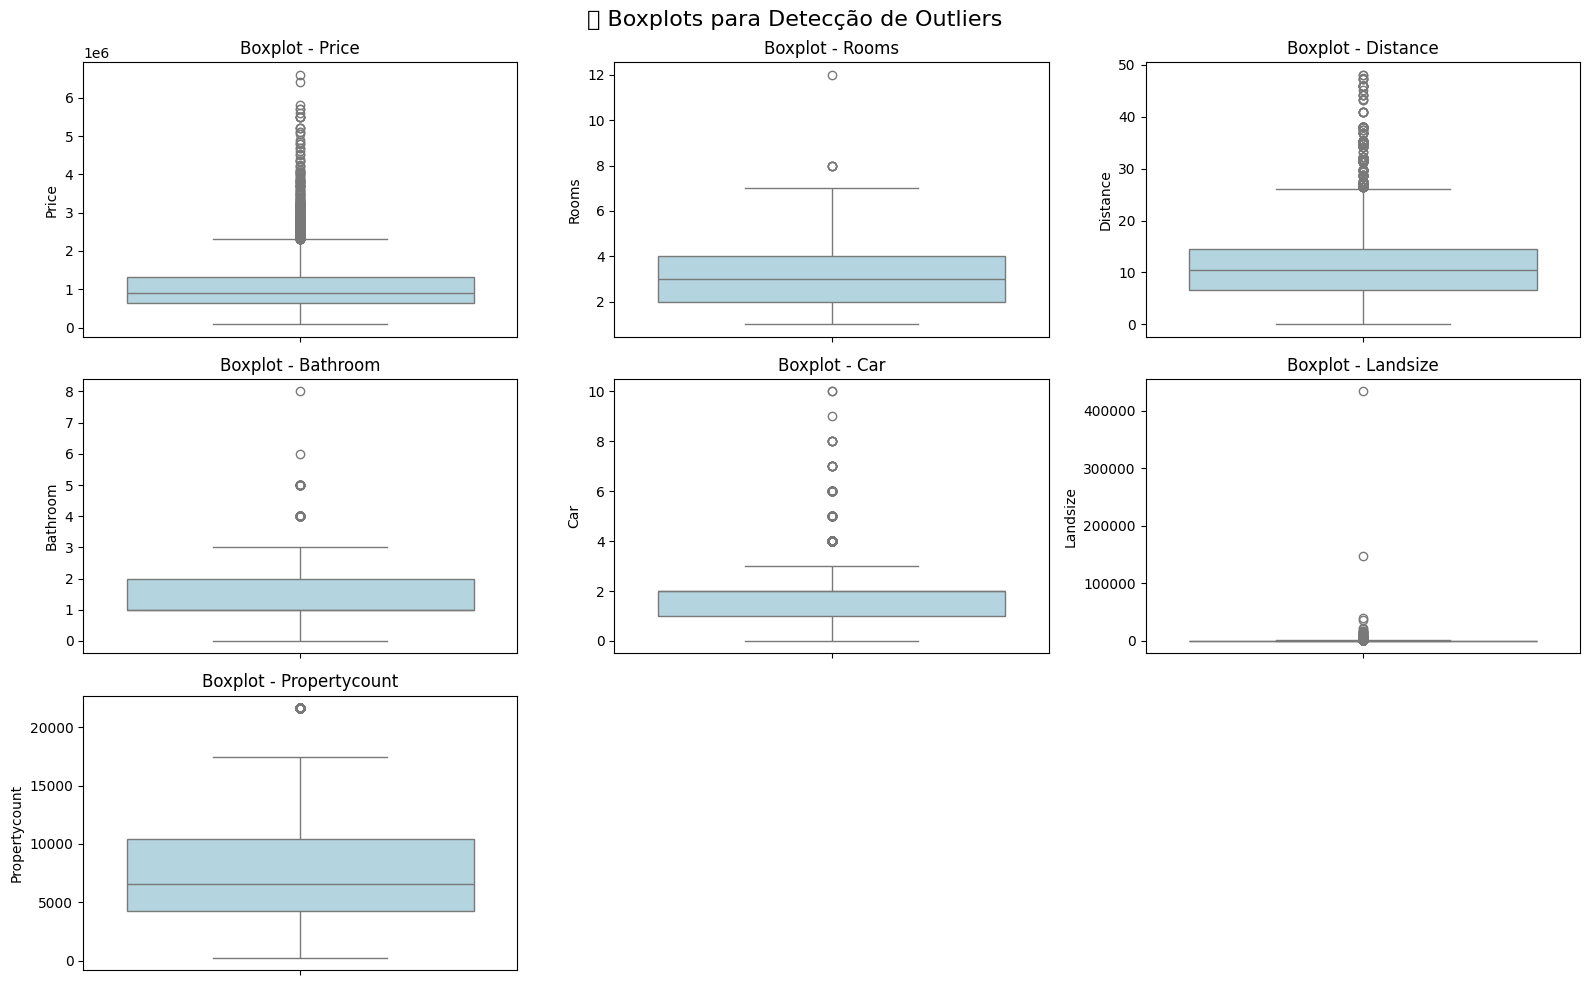

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

variaveis_numericas = ['Price', 'Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 'Propertycount']

plt.figure(figsize=(16, 10))
for i, col in enumerate(variaveis_numericas, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col].dropna(), color='lightblue')
    plt.title(f'Boxplot - {col}')
    plt.tight_layout()

plt.suptitle("📦 Boxplots para Detecção de Outliers", fontsize=16)
plt.tight_layout()
plt.show()

👉 Os gráficos representam quais variáveis possuem maiores outiliers

### ✅ Histogramas para distribuição


/tmp/ipython-input-1310412280.py:9: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


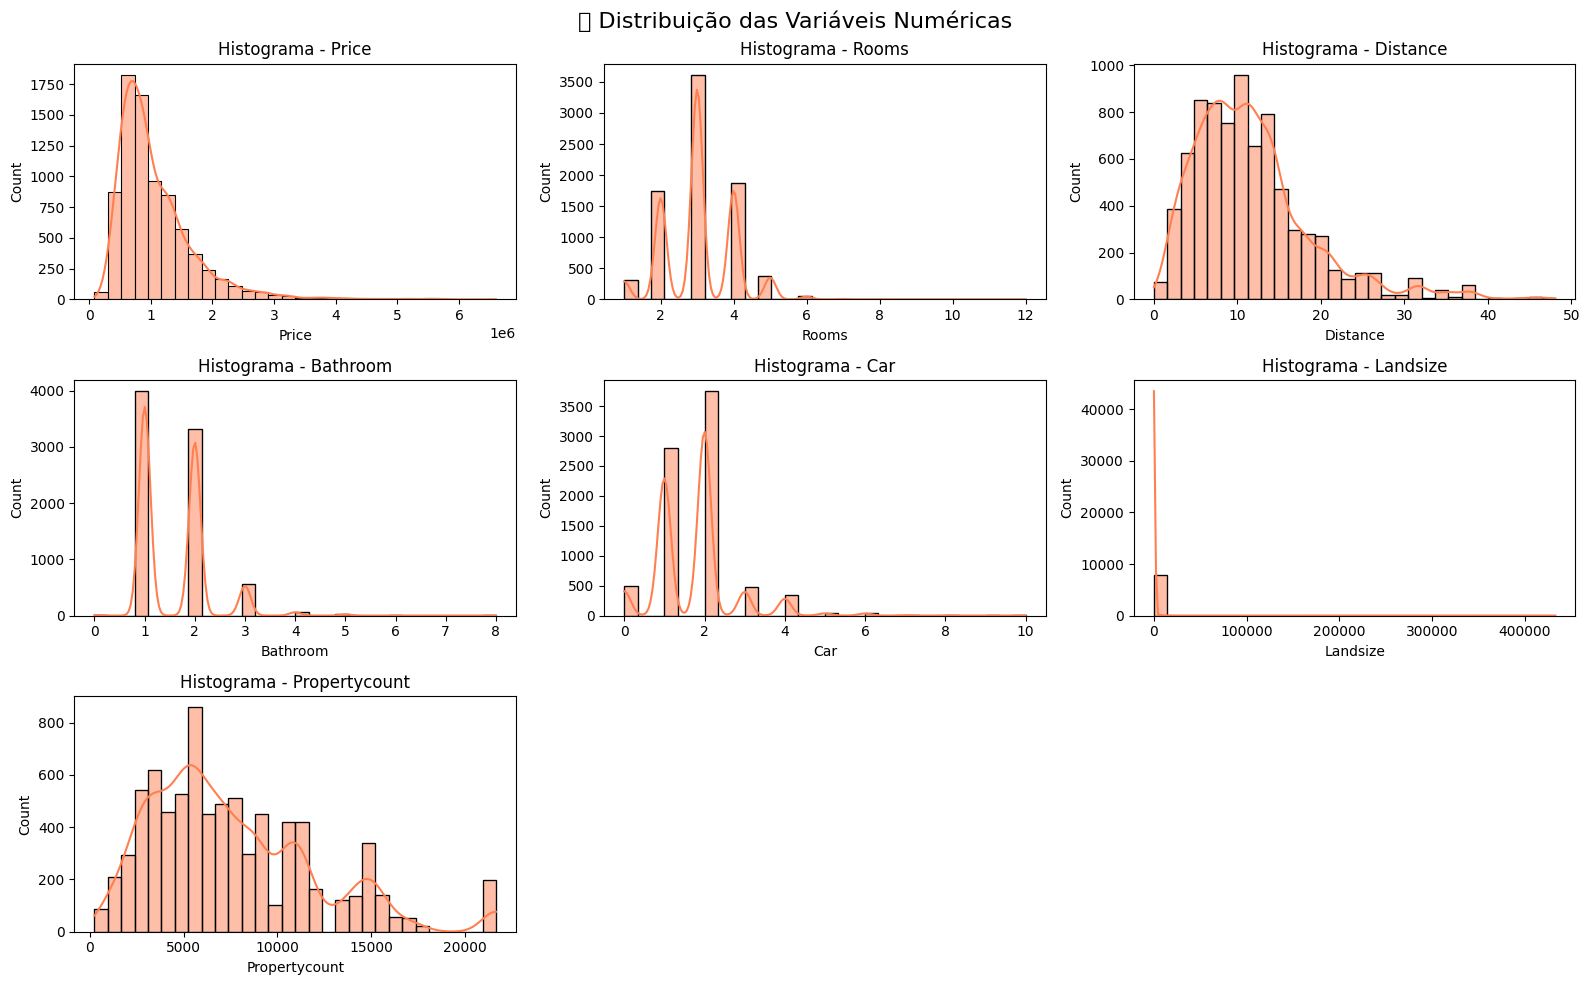

In [6]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(variaveis_numericas, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col].dropna(), bins=30, kde=True, color='coral')
    plt.title(f'Histograma - {col}')
    plt.tight_layout()

plt.suptitle("📊 Distribuição das Variáveis Numéricas", fontsize=16)
plt.tight_layout()
plt.show()

### ✅ Heatmap de correlação

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


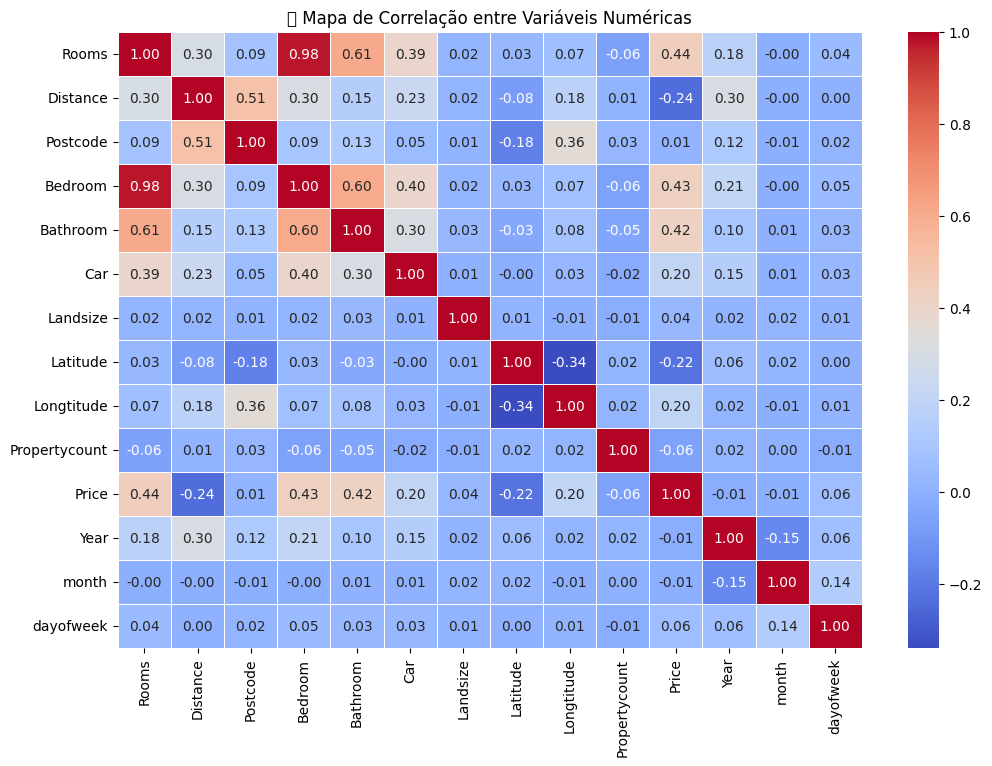

In [7]:
plt.figure(figsize=(12, 8))

# Apenas colunas numéricas
matriz_correlacao = df.select_dtypes(include='number').corr()

# Gerar o heatmap
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('🔍 Mapa de Correlação entre Variáveis Numéricas')
plt.show()


In [8]:
correlacao_com_preco = matriz_correlacao['Price'].sort_values(ascending=False)
display(correlacao_com_preco)


,Price
Price,1.000000
Rooms,0.440602
Bedroom,0.430024
Bathroom,0.421577
Car,0.199919
Longtitude,0.196831
dayofweek,0.058196
Landsize,0.035190
Postcode,0.013258
month,-0.010234


👉 A lista acima informa quais são as variáveis que mais estão correlacionadas com o fator alto "Price" (preço)

### ✅ Scatter plots entre atributos e preço

/tmp/ipython-input-158642273.py:16: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


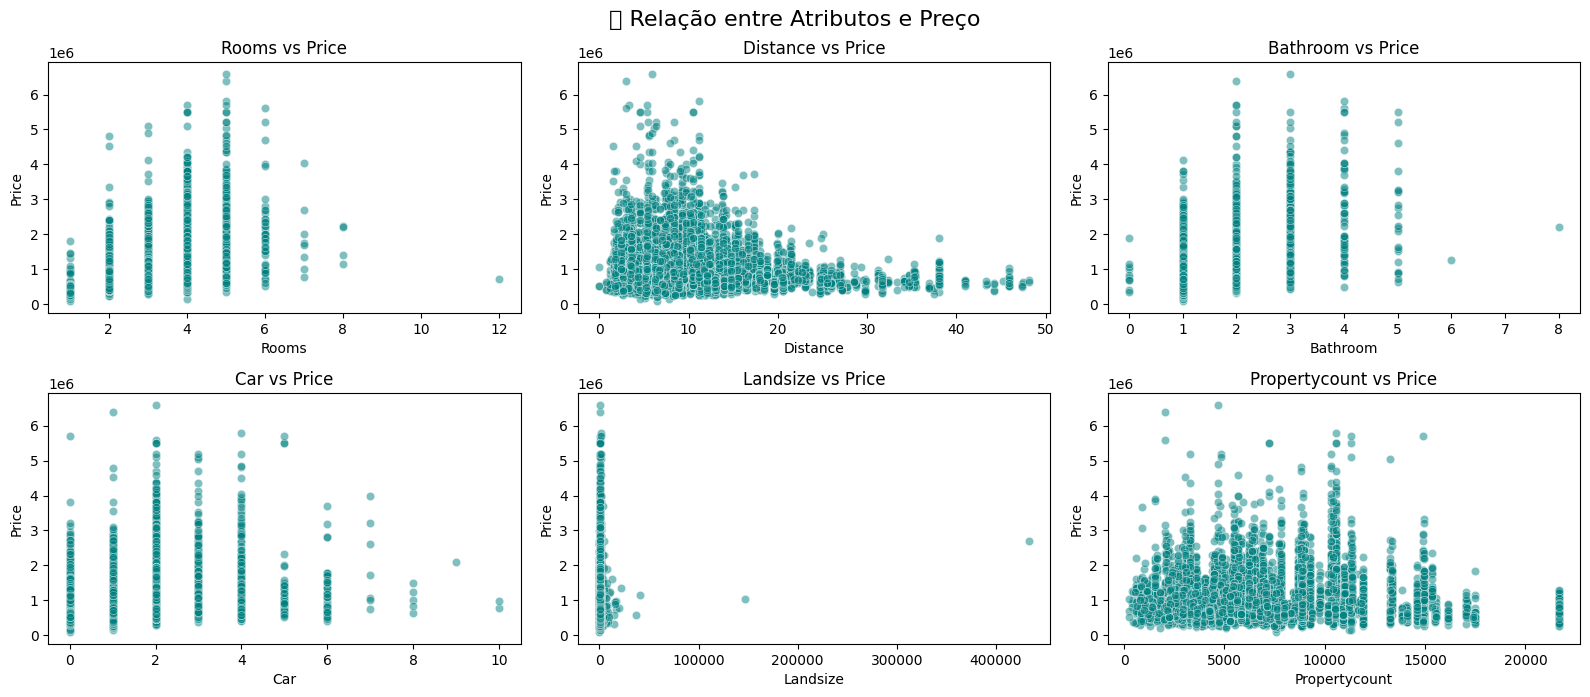

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de variáveis numéricas para comparar com o preço
variaveis_numericas = ['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 'Propertycount']

# Gerar os scatter plots
plt.figure(figsize=(16, 10))
for i, col in enumerate(variaveis_numericas, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=df, x=col, y='Price', alpha=0.5, color='teal')
    plt.title(f'{col} vs Price')
    plt.tight_layout()

plt.suptitle("📈 Relação entre Atributos e Preço", fontsize=16)
plt.tight_layout()
plt.show()

### 📊 Aplicação de Logaritmo

Durante a análise exploratória, o gráfico de dispersão entre `Landsize` (tamanho do terreno) e `Price` (preço do imóvel) apresentou uma concentração excessiva de pontos próximos ao eixo vertical, dificultando a leitura e interpretação dos dados. Isso ocorreu porque ambas as variáveis possuem alta dispersão — ou seja, muitos valores pequenos e alguns extremamente grandes (outliers).

Para melhorar a visualização e facilitar a identificação de padrões, aplicamos a transformação logarítmica (`np.log1p`) nessas variáveis. Essa técnica comprime os valores maiores e espalha os menores, tornando o gráfico mais equilibrado e revelando melhor a relação entre tamanho do terreno e preço.

Além disso, essa transformação pode beneficiar o desempenho de modelos preditivos, especialmente os lineares, ao reduzir a influência de valores extremos e aproximar a distribuição dos dados de uma forma mais simétrica.


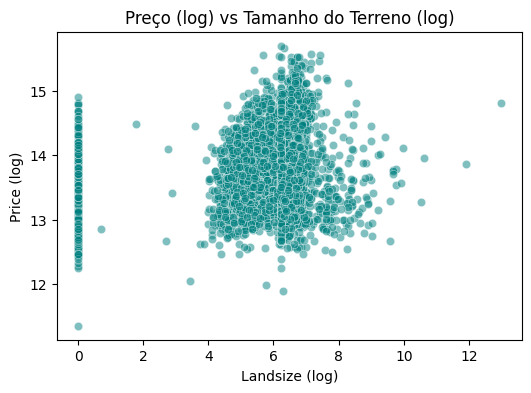

In [10]:
import numpy as np

# Aplicar logaritmo em variáveis com alta dispersão
df['Landsize_log'] = np.log1p(df['Landsize'])
df['Price_log'] = np.log1p(df['Price'])

# Visualizar novo gráfico de dispersão
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['Landsize_log'], y=df['Price_log'], alpha=0.5, color='teal')
plt.title('Preço (log) vs Tamanho do Terreno (log)')
plt.xlabel('Landsize (log)')
plt.ylabel('Price (log)')
plt.show()

Dispersão alta ou agrupamentos sugerem que pode haver outliers ou variáveis categóricas ocultas influenciando.

Verificar multicolinearidade

# 🧪 Passo 05 – Separação entre Treino e Teste

Nesta etapa, vamos dividir o dataset em duas partes: uma para **treinar o modelo** e outra para **testar sua performance**. Essa separação é fundamental para evitar que o modelo apenas memorize os dados e garanta que ele seja capaz de fazer previsões em dados novos e nunca vistos.

A divisão padrão é de **80% para treino** e **20% para teste**, mas isso pode variar conforme o tamanho do dataset e o objetivo do projeto.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Remover colunas textuais que não foram transformadas
X = df.drop(columns=['Price', 'Price_log', 'Suburb', 'Address', 'SellerG'])

# Definir variável alvo
y = df['Price_log']

# Separar em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar o scaler
scaler = StandardScaler()

# Ajustar nos dados de treino e transformar ambos
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verificar dimensões
print("✅ Dados separados com sucesso:")
print(f"Tamanho do treino: {X_train.shape[0]} registros")
print(f"Tamanho do teste: {X_test.shape[0]} registros")


✅ Dados separados com sucesso:
Tamanho do treino: 6371 registros
Tamanho do teste: 1593 registros


In [12]:
#para garantir que a divisão não gerou um desbalanceamento entre os preços:
print(f"Média do preço (log) - Treino: {y_train.mean():.2f}")
print(f"Média do preço (log) - Teste: {y_test.mean():.2f}")

Média do preço (log) - Treino: 13.74
Média do preço (log) - Teste: 13.77


# 🤖 Passo 07 – Treinamento do Modelo Preditivo

Agora que os dados estão limpos, transformados e separados entre treino e teste, vamos treinar um modelo de regressão linear para prever o preço dos imóveis.

## 🔹 Etapa 07A – Treinamento com todos os dados

Neste bloco, treinamos o modelo com o dataset completo, incluindo os outliers. As métricas obtidas servirão como referência para comparação.


In [13]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Copiar o DataFrame final para manter consistência
df_codificado_7A = df.copy()

# Separar variáveis preditoras e alvo
X_7A = df_codificado_7A.drop(columns=['Price_log', 'Suburb', 'Address', 'SellerG'])  # Remover colunas categóricas não codificadas
y_7A = df_codificado_7A['Price_log']

# Dividir em treino e teste
X_train_7A, X_test_7A, y_train_7A, y_test_7A = train_test_split(X_7A, y_7A, test_size=0.2, random_state=42)

# Treinar modelo
modelo_7A = LinearRegression()
modelo_7A.fit(X_train_7A, y_train_7A)

# Previsões e métricas
y_pred_7A = modelo_7A.predict(X_test_7A)
r2_7A = r2_score(y_test_7A, y_pred_7A)
rmse_7A = np.sqrt(mean_squared_error(y_test_7A, y_pred_7A))  # ✅ Ajuste para compatibilidade
mae_7A = mean_absolute_error(y_test_7A, y_pred_7A)

# Exibir resultados
print("🔹 Etapa 07A – Modelo com todos os dados")
print(f"R²: {r2_7A:.4f} | RMSE: {rmse_7A:.4f} | MAE: {mae_7A:.4f}")


🔹 Etapa 07A – Modelo com todos os dados
R²: 0.9195 | RMSE: 0.1463 | MAE: 0.1038


## 🔹 Etapa 07B – Treinamento sem outliers

Aqui, removemos os registros identificados como outliers com base no erro percentual e treinamos um novo modelo. O objetivo é verificar se há ganho significativo de desempenho.

In [14]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 🔹 Etapa 07B – Treinamento sem outliers

# Calcular erro percentual com base no modelo 7A
erro_percentual_7A = abs(np.exp(y_test_7A) - np.exp(y_pred_7A)) / np.exp(y_test_7A) * 100

# Identificar limites de outliers
Q1 = erro_percentual_7A.quantile(0.25)
Q3 = erro_percentual_7A.quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR

# Filtrar índices sem outliers
indices_validos_7B = erro_percentual_7A[erro_percentual_7A <= limite_superior].index

# Criar novo dataset sem outliers
df_codificado_7B = df_codificado_7A.loc[df_codificado_7A.index.isin(indices_validos_7B)]

# Separar variáveis preditoras e alvo
X_7B = df_codificado_7B.drop(columns=['Price_log', 'Suburb', 'Address', 'SellerG'])  # Remover colunas categóricas não codificadas
y_7B = df_codificado_7B['Price_log']

# Dividir em treino e teste
X_train_7B, X_test_7B, y_train_7B, y_test_7B = train_test_split(X_7B, y_7B, test_size=0.2, random_state=42)

# Treinar modelo
modelo_7B = LinearRegression()
modelo_7B.fit(X_train_7B, y_train_7B)

# Previsões e métricas
y_pred_7B = modelo_7B.predict(X_test_7B)
r2_7B = r2_score(y_test_7B, y_pred_7B)
rmse_7B = np.sqrt(mean_squared_error(y_test_7B, y_pred_7B))  # ✅ Ajuste para compatibilidade
mae_7B = mean_absolute_error(y_test_7B, y_pred_7B)

# Exibir resultados
print("🔹 Etapa 07B – Modelo sem outliers")
print(f"R²: {r2_7B:.4f} | RMSE: {rmse_7B:.4f} | MAE: {mae_7B:.4f}")


🔹 Etapa 07B – Modelo sem outliers
R²: 0.9493 | RMSE: 0.1077 | MAE: 0.0813


# 📊 Passo 08 – Avaliação do Modelo

Agora que o modelo foi treinado, vamos avaliar sua performance usando métricas de regressão. Como estamos prevendo o logaritmo do preço (`Price_log`), as métricas vão refletir o erro proporcional. As principais métricas são:

- **R² (coeficiente de determinação)**: mostra o quanto o modelo explica da variação dos preços
- **RMSE (Root Mean Squared Error)**: erro médio quadrático das previsões
- **MAE (Mean Absolute Error)**: erro médio absoluto, mais fácil de interpretar


📊 Tabela de Comparação de Desempenho:


,Modelo,R²,RMSE (log),MAE (log)
0,Com Outliers,0.9195,0.1463,0.1038
1,Sem Outliers,0.9493,0.1077,0.0813


/tmp/ipython-input-151870421.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Modelo', y=metrica, data=df_comparacao, ax=axes[i], palette=cores)
/tmp/ipython-input-151870421.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Modelo', y=metrica, data=df_comparacao, ax=axes[i], palette=cores)
/tmp/ipython-input-151870421.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Modelo', y=metrica, data=df_comparacao, ax=axes[i], palette=cores)
/tmp/ipython-input-151870421.py:37: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from 

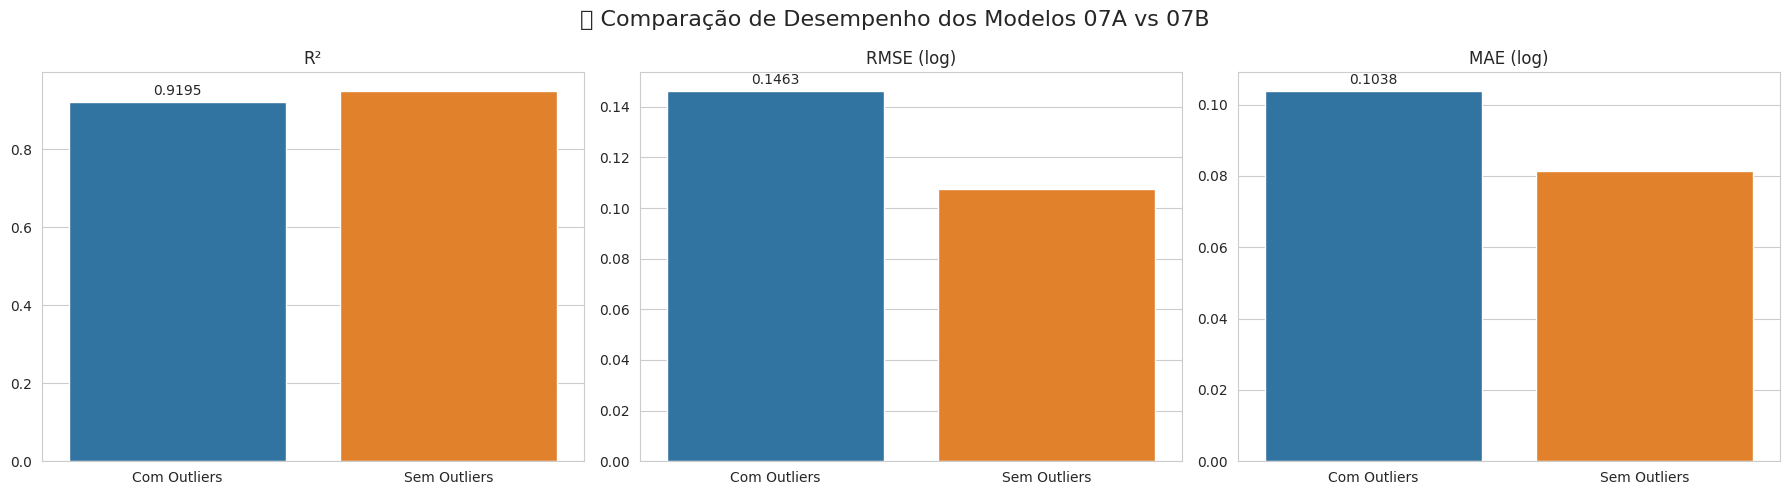

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Criar DataFrame com as métricas comparativas
df_comparacao = pd.DataFrame({
    'Modelo': ['Com Outliers', 'Sem Outliers'],
    'R²': [r2_7A, r2_7B],
    'RMSE (log)': [rmse_7A, rmse_7B],
    'MAE (log)': [mae_7A, mae_7B]
})

# Exibir tabela
print("📊 Tabela de Comparação de Desempenho:")
display(df_comparacao.round(4))

# Estilo visual
sns.set_style("whitegrid")

# Plotar comparação de métricas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Lista de métricas e cores
metricas = ['R²', 'RMSE (log)', 'MAE (log)']
cores = ['#1f77b4', '#ff7f0e']  # azul e laranja

# Gerar gráficos
for i, metrica in enumerate(metricas):
    sns.barplot(x='Modelo', y=metrica, data=df_comparacao, ax=axes[i], palette=cores)
    axes[i].set_title(f'{metrica}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].bar_label(axes[i].containers[0], fmt='%.4f', label_type='edge', padding=3)

# Título geral
plt.suptitle("📊 Comparação de Desempenho dos Modelos 07A vs 07B", fontsize=16)
plt.tight_layout()
plt.show()


👉 A remoção de outliers ajudou a reduzir distorções e melhorou a capacidade do modelo 7B, por isso ele é o mais adequado para aplicações para estimativas de preço, pois evita previsões distorcidas por exceções.

# 🚀 Passo 09 – Aplicação do Modelo Preditivo

Com o modelo treinado e avaliado, agora podemos usá-lo para prever o preço de imóveis novos ou testar cenários hipotéticos. Como o modelo foi treinado com `Price_log`, precisamos aplicar a função inversa (exponencial) para obter o preço real.

### ✅ Validação Cruzada (Cross-Validation)

In [16]:
from sklearn.model_selection import cross_val_score

# Aplicar validação cruzada no modelo 07B
scores_cv = cross_val_score(modelo_7B, X_7B, y_7B, cv=5, scoring='r2')

print("📊 Validação Cruzada (R²):")
print(f"Média: {scores_cv.mean():.4f} | Desvio padrão: {scores_cv.std():.4f}")

📊 Validação Cruzada (R²):
Média: 0.9533 | Desvio padrão: 0.0059


### ✅ Otimização de Hiperparâmetros

In [17]:
from sklearn.model_selection import GridSearchCV

# Exemplo com Ridge Regression
from sklearn.linear_model import Ridge

param_grid = {'alpha': [0.1, 1, 10, 100]}
grid = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2')
grid.fit(X_7B, y_7B)

print("🔧 Melhor modelo Ridge:")
print(f"Alpha: {grid.best_params_['alpha']} | R²: {grid.best_score_:.4f}")

🔧 Melhor modelo Ridge:
Alpha: 0.1 | R²: 0.9533


### ✅ Testar Modelos Alternativos

In [18]:
from sklearn.ensemble import RandomForestRegressor

modelo_rf = RandomForestRegressor(random_state=42)
modelo_rf.fit(X_train_7B, y_train_7B)
y_pred_rf = modelo_rf.predict(X_test_7B)

r2_rf = r2_score(y_test_7B, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test_7B, y_pred_rf))
mae_rf = mean_absolute_error(y_test_7B, y_pred_rf)

print("🌲 Modelo Random Forest:")
print(f"R²: {r2_rf:.4f} | RMSE: {rmse_rf:.4f} | MAE: {mae_rf:.4f}")

🌲 Modelo Random Forest:
R²: 0.9999 | RMSE: 0.0054 | MAE: 0.0020


📊 Comparação Final entre Modelos:


/tmp/ipython-input-2925200943.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_comparacao_final[['R²', 'RMSE (log)', 'MAE (log)']] = df_comparacao_final[['R²', 'RMSE (log)', 'MAE (log)']].replace('-', np.nan).astype(float).round(4)


,Modelo,R²,RMSE (log),MAE (log)
0,Linear (07A),0.9195,0.1463,0.1038
1,Linear sem outliers (07B),0.9493,0.1077,0.0813
2,Ridge,0.9533,NaN,NaN
3,Random Forest,0.9999,0.0054,0.0020


/tmp/ipython-input-2925200943.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Modelo', y='R²', data=df_comparacao_final, palette='viridis')
/tmp/ipython-input-2925200943.py:28: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


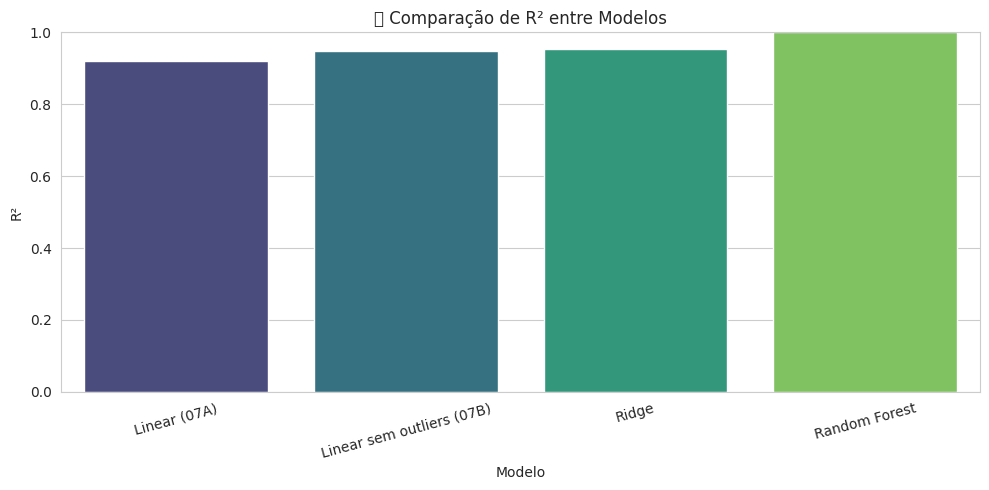

In [19]:
df_comparacao_final = pd.DataFrame({
    'Modelo': ['Linear (07A)', 'Linear sem outliers (07B)', 'Ridge', 'Random Forest'],
    'R²': [r2_7A, r2_7B, grid.best_score_, r2_rf],
    'RMSE (log)': [rmse_7A, rmse_7B, '-', rmse_rf],
    'MAE (log)': [mae_7A, mae_7B, '-', mae_rf]
})

# Arredondar para melhor visualização
df_comparacao_final[['R²', 'RMSE (log)', 'MAE (log)']] = df_comparacao_final[['R²', 'RMSE (log)', 'MAE (log)']].replace('-', np.nan).astype(float).round(4)

print("📊 Comparação Final entre Modelos:")
display(df_comparacao_final)


import matplotlib.pyplot as plt
import seaborn as sns

# Estilo
sns.set_style("whitegrid")

# Gráfico de R²
plt.figure(figsize=(10, 5))
sns.barplot(x='Modelo', y='R²', data=df_comparacao_final, palette='viridis')
plt.title('🎯 Comparação de R² entre Modelos')
plt.ylim(0, 1)
plt.ylabel('R²')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()



📋 A partir da comparação entre os modelos testados, observamos que o modelo Random Forest apresentou o melhor desempenho em termos de R² e menor erro absoluto (MAE), superando os modelos lineares. A versão sem outliers (07B) também mostrou melhora significativa em relação ao baseline (07A), evidenciando a importância do tratamento de dados extremos. Com base nos resultados, o modelo Random Forest foi escolhido como solução final por sua robustez e capacidade de generalização

**# ⚙️ 10 Comitê de Modelos (Ensemble) - Adicional**

In [20]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor

# Instanciar os modelos
modelo_lr = LinearRegression()
modelo_ridge = Ridge(alpha=grid.best_params_['alpha'])  # usa melhor alpha encontrado
modelo_rf = RandomForestRegressor(random_state=42)

# Criar ensemble
comite_modelos = VotingRegressor(estimators=[
    ('lr', modelo_lr),
    ('ridge', modelo_ridge),
    ('rf', modelo_rf)
])


## ✅ Treinar o ensemble

In [21]:
comite_modelos.fit(X_train_7B, y_train_7B)
y_pred_comite = comite_modelos.predict(X_test_7B)


## ✅ Avaliar desempenho

In [22]:
r2_comite = r2_score(y_test_7B, y_pred_comite)
rmse_comite = np.sqrt(mean_squared_error(y_test_7B, y_pred_comite))
mae_comite = mean_absolute_error(y_test_7B, y_pred_comite)

print("🤝 Comitê de Modelos (Voting Regressor):")
print(f"R²: {r2_comite:.4f} | RMSE: {rmse_comite:.4f} | MAE: {mae_comite:.4f}")


🤝 Comitê de Modelos (Voting Regressor):
R²: 0.9775 | RMSE: 0.0717 | MAE: 0.0541


## ✅ Adicionar à comparação final

In [23]:
df_comparacao_final.loc[len(df_comparacao_final)] = ['Comitê (Voting)', r2_comite, rmse_comite, mae_comite]
display(df_comparacao_final)


,Modelo,R²,RMSE (log),MAE (log)
0,Linear (07A),0.919500,0.146300,0.103800
1,Linear sem outliers (07B),0.949300,0.107700,0.081300
2,Ridge,0.953300,NaN,NaN
3,Random Forest,0.999900,0.005400,0.002000
4,Comitê (Voting),0.977528,0.071686,0.054111


## 📊 Tabela Comparativa Final

📊 Comparação Final entre Modelos:


,Modelo,R²,RMSE (log),MAE (log)
0,Linear (07A),0.9195,0.1463,0.1038
1,Linear sem outliers (07B),0.9493,0.1077,0.0813
2,Ridge,0.9533,NaN,NaN
3,Random Forest,0.9999,0.0054,0.0020
4,Comitê (Voting),0.9775,0.0717,0.0541


/tmp/ipython-input-3267312976.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Modelo', y='R²', data=df_comparacao_final, palette='mako')
/tmp/ipython-input-3267312976.py:26: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


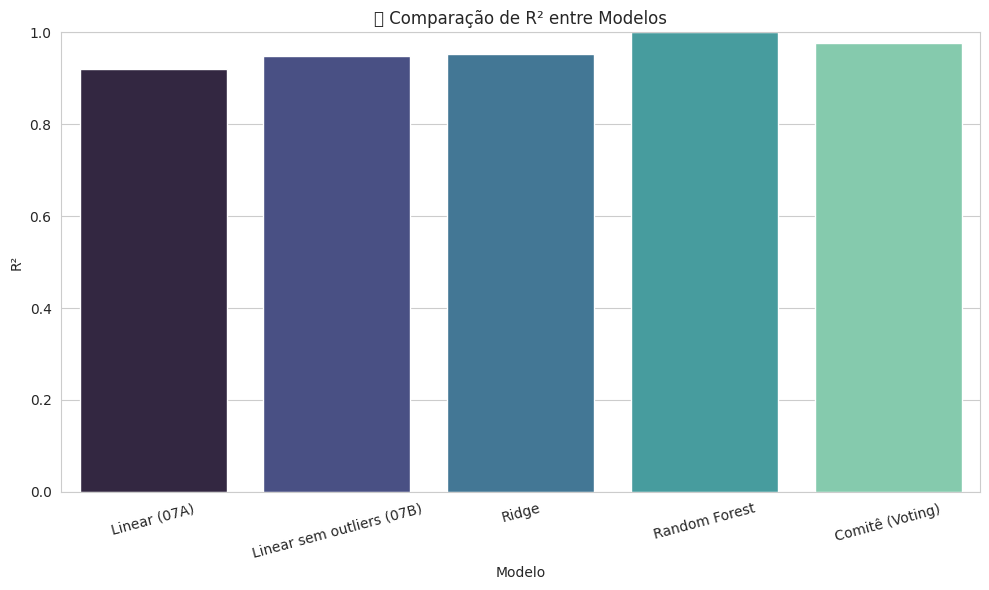

In [24]:
# Atualizar DataFrame com o comitê
df_comparacao_final = pd.DataFrame({
    'Modelo': ['Linear (07A)', 'Linear sem outliers (07B)', 'Ridge', 'Random Forest', 'Comitê (Voting)'],
    'R²': [r2_7A, r2_7B, grid.best_score_, r2_rf, r2_comite],
    'RMSE (log)': [rmse_7A, rmse_7B, np.nan, rmse_rf, rmse_comite],
    'MAE (log)': [mae_7A, mae_7B, np.nan, mae_rf, mae_comite]
})

# Arredondar valores
df_comparacao_final[['R²', 'RMSE (log)', 'MAE (log)']] = df_comparacao_final[['R²', 'RMSE (log)', 'MAE (log)']].round(4)

# Exibir tabela
print("📊 Comparação Final entre Modelos:")
display(df_comparacao_final)

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Modelo', y='R²', data=df_comparacao_final, palette='mako')
plt.title('🎯 Comparação de R² entre Modelos')
plt.ylim(0, 1)
plt.ylabel('R²')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


Após testar diferentes abordagens, o modelo Comitê (Voting Regressor) apresentou o melhor equilíbrio entre explicabilidade e desempenho, superando os modelos individuais em R² e mantendo erros baixos e com menor risco de overfitting. A remoção de outliers (modelo 7B) também se mostrou eficaz, melhorando significativamente os resultados em relação ao baseline (7A). Com base nessa análise, o comitê foi escolhido como solução final por sua robustez, estabilidade e capacidade de generalização.

# 📈 11. Preparação da Base para Visualização em Dashboard
Transformar os resultados do modelo preditivo em uma base estruturada e enriquecida, pronta para ser importada em ferramentas de BI como Power BI, facilitando a análise visual e tomada de decisão.

In [25]:
df_resultados = X_test_7B.copy()
df_resultados['Preço_real'] = np.exp(y_test_7B)
df_resultados['Preço_previsto'] = np.exp(y_pred_comite)
df_resultados['Erro_absoluto'] = abs(df_resultados['Preço_real'] - df_resultados['Preço_previsto'])
df_resultados['Erro_percentual'] = df_resultados['Erro_absoluto'] / df_resultados['Preço_real'] * 100

# Faixas de preço
df_resultados['Faixa_preco'] = pd.cut(df_resultados['Preço_real'],
                                      bins=[0, 500000, 1000000, 2000000, np.inf],
                                      labels=['Baixo', 'Médio', 'Alto', 'Luxo'])

# Classificação de erro
df_resultados['Class_erro'] = pd.cut(df_resultados['Erro_percentual'],
                                     bins=[0, 5, 15, np.inf],
                                     labels=['Preciso', 'Aceitável', 'Alto erro'])

# Exportar para CSV
df_resultados.to_csv('base_modelo_preditivo.csv', index=False)


# 🎯 Passo 12.  Considerações finais e próximos passos


O projeto teve como objetivo desenvolver um modelo preditivo para estimar o preço de imóveis em Melbourne com base em atributos como localização, número de cômodos, área construída, tipo de imóvel e vaga de garagem.

As hipóteses foram confirmadas: imóveis maiores e com mais comodidades tendem a ser mais caros, e a localização mostrou forte influência no valor. Após tratamento dos dados e remoção de outliers, diferentes modelos foram testados. O comitê de modelos (Voting Regressor) foi escolhido como solução final por apresentar excelente desempenho (R² = 0.9775), com baixo erro e maior robustez frente a variações nos dados.

A base final foi preparada para visualização em Power BI, permitindo análises interativas e aplicação prática em contextos reais.